# The Heat Equation

The one dimensional heat equation is the following,

\begin{equation}
\partial_tu(x,t) = \alpha \partial^2_x u(x,t),
\end{equation}

where $\alpha$ is a constant.

In [211]:
%matplotlib notebook
# import necessary packages
import numpy as np
from ipywidgets import *
import matplotlib.pyplot as plt
# we'll need Matrix, UGrid, and Approximator
from etraj.etraj import Vector, Matrix, UGrid, Approximator, ScalarField, heatEquation
import etraj.etraj as et

In [212]:
# create the microstates
N = 1000
left = 0.0
right = 10.0
x = np.random.uniform(left,right,N)

# create the grid
g = UGrid(x)

In [213]:
# create a scalar field which is a Gaussian centered at mu = 5.0
mu = 5.0
k = 20
n = 20
f = (1/np.sqrt(2*np.pi))*np.exp(-.5*(x - mu)**2)
s = ScalarField(g,f,g.get_logger())
s.get_approximator().set_k(k)
s.get_approximator().set_n(n)

<IPython.core.display.Javascript object>


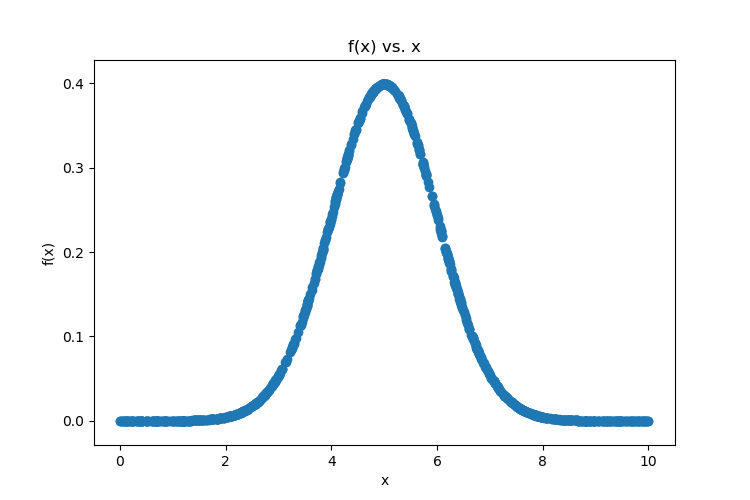

In [214]:
# plot the values of the function
fig, axs = plt.subplots(figsize=(7.5,5))
axs.scatter(x,f)
axs.set_xlabel("x")
axs.set_ylabel("f(x)")
axs.set_title("f(x) vs. x")
plt.show()

In [215]:
# let's create a diffEQ object for the heat equation
h_eq = heatEquation()
h_eq.set_alpha(1.0)
h_eq.set_scalarfield(s)

In [216]:
# let's generate a simple Runge-Kutta algorithm using the diffEQ's methods
def rk4(steps=1,t=0,dt=.01):
    for k in range(steps):
        p = g.get_ugrid()
        d2f_dx2 = np.asarray(h_eq.dt(p,0,[0]))
        f_new = np.asarray(f) + dt*d2f_dx2
        h_eq.get_scalarfield().set_field(f_new)

In [223]:
rk4(steps=10,dt=.01)

<IPython.core.display.Javascript object>


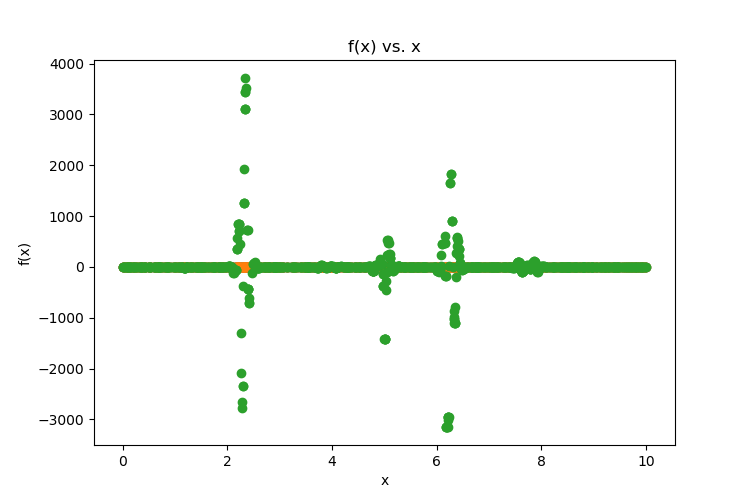

In [224]:
f_plot = s.get_field()
dt = h_eq.dt(g.get_ugrid(),0,[0])
# plot the values of the function
fig, axs = plt.subplots(figsize=(7.5,5))
axs.scatter(x,f)
axs.scatter(x,f_plot)
axs.scatter(x,dt)
axs.set_xlabel("x")
axs.set_ylabel("f(x)")
axs.set_title("f(x) vs. x")
plt.show()